<a href="https://colab.research.google.com/github/nicocarrion1/DiploDatos_AyV_G5/blob/main/Entregable_Curaci%C3%B3n_de_datos_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

<font color='orange'>
Grupo: Nicolás Carrión, Génesis Núñez Sanchez, Exequiel Santucho, Magdalena Sella
</font>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [ ]:
import plotly as plt
plt.__version__
# Make sure it's 4.14.3

'5.0.0'

In [ ]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

mebl_df_respaldo = melb_df
melb_df[:10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


## Ejercicio 1: 
1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [ ]:
print('Cantidad de registros: ', len(melb_df))
melb_df.describe().round(1)

Cantidad de registros:  13580


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.0,13580.0,13580.0,13580.0,13580.0,13580.0,13518.0,13580.0,7130.0,8205.0,13580.0,13580.0,13580.0
mean,2.9,1075684.1,10.1,3105.3,2.9,1.5,1.6,558.4,152.0,1964.7,-37.8,145.0,7454.4
std,1.0,639310.7,5.9,90.7,1.0,0.7,1.0,3990.7,541.0,37.3,0.1,0.1,4378.6
min,1.0,85000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.2,144.4,249.0
25%,2.0,650000.0,6.1,3044.0,2.0,1.0,1.0,177.0,93.0,1940.0,-37.9,144.9,4380.0
50%,3.0,903000.0,9.2,3084.0,3.0,1.0,2.0,440.0,126.0,1970.0,-37.8,145.0,6555.0
75%,3.0,1330000.0,13.0,3148.0,3.0,2.0,2.0,651.0,174.0,1999.0,-37.8,145.1,10331.0
max,10.0,9000000.0,48.1,3977.0,20.0,8.0,10.0,433014.0,44515.0,2018.0,-37.4,145.5,21650.0


Como se puede observar, el dataframe se refiere a las características de propiedades que fueron vendidas y cuenta con 13.580 filas. A continuación, se presenta la información de cada columna del dataframe a los fines de determinar los límites que se impondrán luego sobre las variables numéricas.

In [ ]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

La variable "Rooms" se limitará a 8 rooms, dado que es el valor más alto que se presenta razonable. Considerando que son "espacios" de la propiedad y no "habitaciones", se entiende que no es un outlier. También se controla que el número de habitaciones sea mayor a 0.

<AxesSubplot:xlabel='Rooms', ylabel='count'>

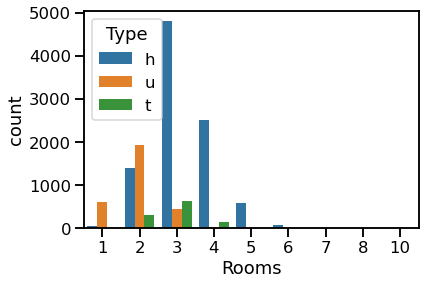

In [ ]:
sns.countplot(data = melb_df, x='Rooms',hue='Type')

In [ ]:
melb_df['Rooms'].value_counts()

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

La variable "Bedroom2" debería limitarse a 8 como máximo, para que no supere el valor de "Rooms". Sin embargo, como se muestra a continuación, las variables "Rooms" y "Bedroom2" se encuentran altamente correlacionadas, por lo que esta última será descartada.

In [ ]:
melb_df['Bedroom2'].value_counts()

3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
20.0       1
10.0       1
Name: Bedroom2, dtype: int64

In [ ]:
melb_df[['Bedroom2','Rooms' ]].corr()

,Bedroom2,Rooms
Bedroom2,1.00000,0.94419
Rooms,0.94419,1.00000


Considerando que la variable "Rooms" fue limitada a 8, la cantidad de baños debería ser menor a este valor. Por esto, la variable fue limitada a 5 o menos, ya que no parece razonable que haya una proporción tan alta de baños en una casa. En caso de que baños = 0, se imputa 1.

In [ ]:
melb_df['Bathroom'].value_counts()

1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
8.0       2
7.0       2
Name: Bathroom, dtype: int64

La variable "Car", que se refiere a la cantidad de cocheras con las que cuenta la propiedad, son limitadas a 6. La frecuencia de esta variabla para una cantidad mayor a 6 es demasiado baja en comparación con la cantidad total de datos, por lo éstos serán tratados como outliers.

In [ ]:
melb_df['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

Como se muestra a continuación, si bien el total dataframe cuenta con 13.580 observaciones, solo hay 7.113 filas que poseen la variable "BuildingArea" con un valor mayor a 0. Se entiende que si se trata de propiedades habitables, el hecho de que los metros construidos no existan (iguales a 0), es un error. Por este motivo, luego se imputarán valores sobre esta variable (en el Entregable-Parte 2).

(0.0, 2000.0)

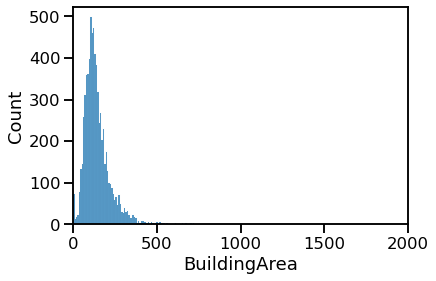

In [ ]:
sns.histplot(data=melb_df, x='BuildingArea').set_xlim(0,2000)

In [ ]:
len(melb_df[melb_df['BuildingArea']>0])

7113

Por último, se dejará afuera el outlier "1196" de la variable "YearBuilt", entendiendo que se trata de un error por tener cerca de 825 años de antigüedad.

In [ ]:
melb_df['YearBuilt'].describe()

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [ ]:
melb_df['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

(0.0, 2000.0)

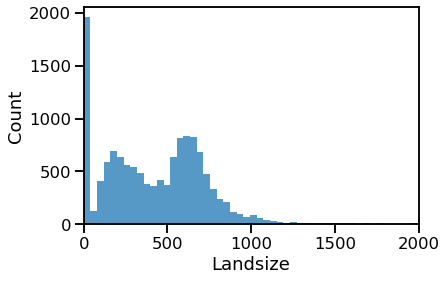

In [ ]:
sns.histplot(data=melb_df, x='Landsize').set_xlim(0,2000)

Ya que más del 99% de las observaciones cuentan con un Landsize menor a 1500, se tomará este como límite.

In [ ]:
# Aplicación de límites sobre las variables:

# Eliminación de columna "Bedroom2"
melb_df.drop(columns=['Bedroom2'], inplace=True)

#Observaciones con 0 baños
melb_df['Bathroom'].replace({0: 1})

# 1) Limitación de ambientes
lim_rooms = 8
lim_bathroom = 5
lim_car = 6
lim_build = 500
lim_landsize = 1500


melb_df = melb_df[(melb_df['Rooms']>0) & (melb_df['Rooms']<=lim_rooms)]
melb_df = melb_df[(melb_df['Bathroom']>0) & (melb_df['Bathroom']<=lim_bathroom)]
melb_df = melb_df[melb_df['Car']<=lim_car]
melb_df = melb_df[(melb_df['Rooms']>0) & (melb_df['Rooms']<=lim_rooms)]
melb_df = melb_df[(melb_df['BuildingArea']<lim_build)|(melb_df['BuildingArea'].isnull())]
melb_df = melb_df[(melb_df['Landsize']<lim_landsize)|(melb_df['Landsize'].isnull())]


# 2) # Control de que número de habitaciones sea mayor o igual a baños
melb_df = melb_df[melb_df['Rooms'] >= melb_df['Bathroom']]

# 3) # Eliminación de año 1196 (se elimina puntualmente porque si se coloca la
# instrucción ">1196" también se eliminan valores NaN, perdiendo mucha información)
melb_df = melb_df[melb_df['YearBuilt'] != 1196.0]
melb_df.describe().round(2)

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13047.00,13047.00,13047.00,13047.00,13047.00,13047.00,13047.00,6861.00,7899.00,13047.00,13047.00,13047.00
mean,2.95,1075168.60,10.19,3104.59,1.53,1.60,417.07,140.06,1964.51,-37.81,144.99,7445.87
std,0.94,626588.44,5.76,89.49,0.67,0.92,291.98,70.96,36.08,0.08,0.10,4382.42
min,1.00,85000.00,0.00,3000.00,1.00,0.00,0.00,0.00,1850.00,-38.17,144.43,389.00
25%,2.00,650000.00,6.30,3044.00,1.00,1.00,171.00,94.00,1940.00,-37.86,144.93,4380.00
50%,3.00,906000.00,9.40,3084.00,1.00,2.00,418.00,126.00,1970.00,-37.80,145.00,6543.00
75%,4.00,1330000.00,13.00,3147.00,2.00,2.00,641.00,172.00,1998.00,-37.76,145.06,10331.00
max,8.00,9000000.00,47.40,3977.00,5.00,6.00,1489.00,495.00,2017.00,-37.41,145.53,21650.00


Como se observa, luego de aplicar los filtros, el dataframe pasa a tener 13.433 observaciones. No se ha perdido demasiada información. A continuación, se grafica la existencia de datos faltantes.

In [ ]:
import missingno as msno

<AxesSubplot:>

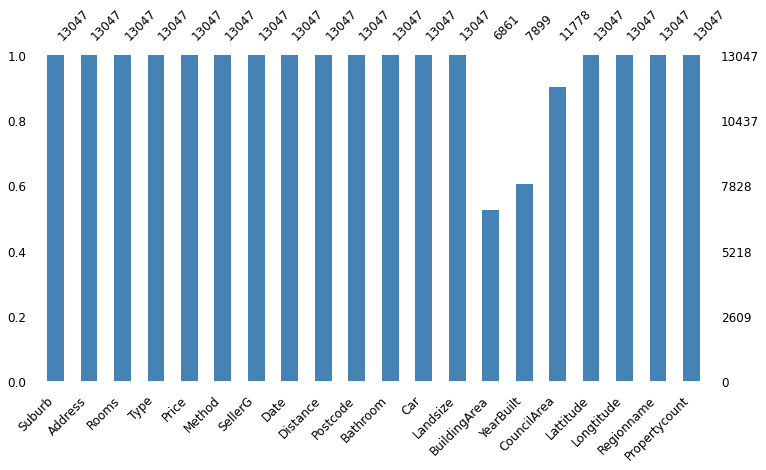

In [ ]:
msno.bar(melb_df,figsize=(12, 6), fontsize=12, color='steelblue')

Luego de graficar las variables, se observa que "BuildingArea", "YearBuilt" y "CouncilArea" poseen datos faltantes. La imputación de la variable categórica "CouncilArea" se hará más adelante, en Ejercicio 2 de esta Parte 1. La imputación de las variables numéricas se harán en la Parte 2 del Entregable.

#### 2. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.

    2.1 Justificar cada columna no seleccionada.
    
    2.2 Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

A continuación se presenta un breve repaso de las variables que quedan afuera del análisis:

Al decidir trabajar con la variable "CouncilArea", se entiende que arroja información valiosa en cuanto a la ubicación de la propiedad, por lo que las variables "Address", "Distance", "Regionname", "Longtitue" y "Lattitude" quedan fuera por aportar el mismo tipo de información que se podría concluir de "CouncilArea". Si bien la variable "Suburb" podría haber sido utilizada para el mismo fin, su gran desagregación la haría dificil de manejar. Sin embargo, se mantendrá por ahora en el dataset por ser necesaria para imputar los datos faltantes en "CouncilArea"

Además, y como se mencionó anteriormente, la variable Bedroom2 se elimina por estar altamente correlacionada con "Rooms".

Dado esto, nuestras columnas relevantes son las restantes variables:

In [ ]:
interesting_melb_cols = ['Suburb', 'Rooms', 'Type', 'Price','Method', 'SellerG',
                         'Date', 'Postcode', 'Bathroom', 'Car', 'Landsize',
                         'BuildingArea', 'YearBuilt', 'CouncilArea','Propertycount']

print('Columnas consideradas: ', interesting_melb_cols)
print('Columnas descartadas: ', list(set(melb_df.columns) - set(interesting_melb_cols))) # "-" difference entre dos conjuntos A y B

melb_df_filt = melb_df.loc[:, interesting_melb_cols]
melb_df_filt.head(3)

Columnas consideradas:  ['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Propertycount']
Columnas descartadas:  ['Distance', 'Lattitude', 'Longtitude', 'Address', 'Regionname']


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,4019.0


3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv). 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


Para importar la información de AirBnB:

In [ ]:
#data source:
#https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv

# airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
# print(airbnb_df.columns)

interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
  'property_type', 'bathrooms', 'bedrooms']

airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
            usecols=interesting_cols)

M:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Nuevo dataframe:

In [ ]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,property_type,bathrooms,bedrooms,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,House,1.0,1.0,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,Apartment,1.0,1.0,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,Apartment,1.0,1.0,159,1253.0,4452.0


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  property_type          22895 non-null  object 
 11  bathrooms              22878 non-null  float64
 12  bedrooms               22890 non-null  float64
 13  price                  22895 non-null  int64  
 14  weekly_price           2524 non-null   float64
 15  mo

La variable "zipcode" es un objeto, por lo que tenemos que convertirla a una variable de tipo float64 para trabajarla.

In [ ]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

Al estudiar la intersección entre la información disponible en la variable "Zipcode" de cada dataframe, se puede concluir que esta variable será la utilizada para unir las dos bases de datos, por encontrarse 191 zipcodes en común de un total de 198 que existen en la base con la información de ventas de propiedades.

In [ ]:
intersection = np.intersect1d(
    airbnb_df.zipcode.values, melb_df_filt.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df_filt.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 195
Common zipcodes 189


Del dataframe proveniente de AirBnB sólo se considerarán la columnas "zipcode" y "price". A continuación se extran estas columnas en un nuevo df. Además, para cada "zipcode" se asigna el valor promedio de la variable "price". De esa manera queda una relación biunívoca entre ambas variables.

In [ ]:
airbnb_price_by_zipcode=airbnb_df[['price','zipcode']]\
  .groupby('zipcode').mean().reset_index()

airbnb_price_by_zipcode

,zipcode,price
0,2010.0,40.000000
1,2134.0,50.000000
2,2582.0,104.000000
3,3000.0,150.504307
4,3001.0,132.500000
...,...,...
242,7367.0,230.000000
243,8938.0,296.000000
244,9004.0,226.000000
245,9540.0,245.000000


In [ ]:
merged_df = melb_df_filt.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode')

merged_df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,zipcode,price
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,4019.0,3067.0,130.624031
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,4019.0,3067.0,130.624031
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,4019.0,3067.0,130.624031


Se renombra la variable "price" (proveniente de la database de Airbnb) por "price_airbnb" para evitar nombres duplicados. A su vez, se descarta la variable "zipcode" por el mismo motivo, ya que está considerada en la variable "Postcode" de la database original.

In [ ]:
merged_df.rename(columns={'price': 'price_airbnb'}, inplace=True)
merged_df.drop('zipcode', axis=1, inplace=True)

merged_df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6186
YearBuilt        5148
CouncilArea      1269
Propertycount       0
price_airbnb       15
dtype: int64

Si se asume que se cuenta con la ayuda de anotadores expertos que pueden encontrar equivalencias entre barrios o direcciones, entonces se puede suponer que las bases pueden ser agregadas utilizando las variables "Suburb" y/o "Neighborhood". Además, se podrían utilizar las variables "Longtitude" y "Lattitude" para crear una nueva variable concatenada que contenga la coordenada de la propiedad. En ese caso se trataría exactamente de la misma ubicación y el mismo tipo de variable.

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



In [ ]:
merged_df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,price_airbnb
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,4019.0,130.624031
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,4019.0,130.624031
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,4019.0,130.624031


<AxesSubplot:>

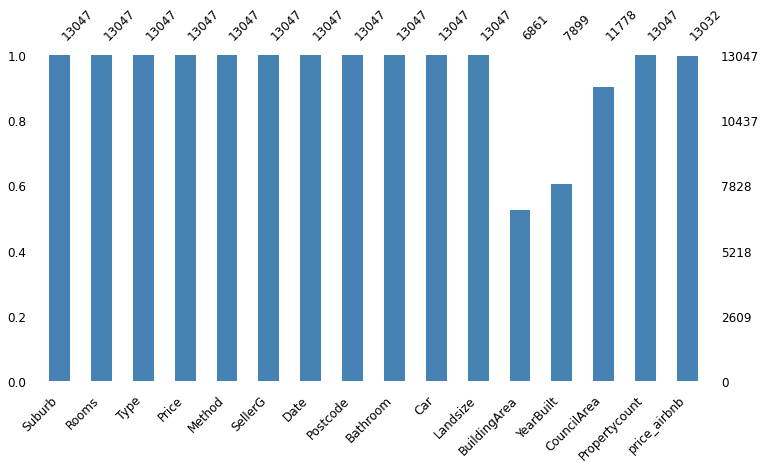

In [ ]:
msno.bar(merged_df,figsize=(12, 6), fontsize=12, color='steelblue')

La variable categórica "CouncilArea" es la que posee valores faltantes. Dado esto, se imputarán valores empleando *CategoricalImputer* de *sklearn*. Otra opción para hacer esto, sería la de imputar valores en base a la información presente en la variable "Suburb", suponiendo que el nombre del barrio es igual al nombre del municipio.

In [ ]:
import sklearn
import sklearn.impute
from sklearn import impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='most_frequent')
merged_df['CouncilArea']=imputer.fit_transform(merged_df['CouncilArea'].values.reshape(-1,1))[:,0]

merged_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,price_airbnb
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,4019.0,130.624031
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,4019.0,130.624031
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,4019.0,130.624031
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra,4019.0,130.624031
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,4019.0,130.624031


<AxesSubplot:>

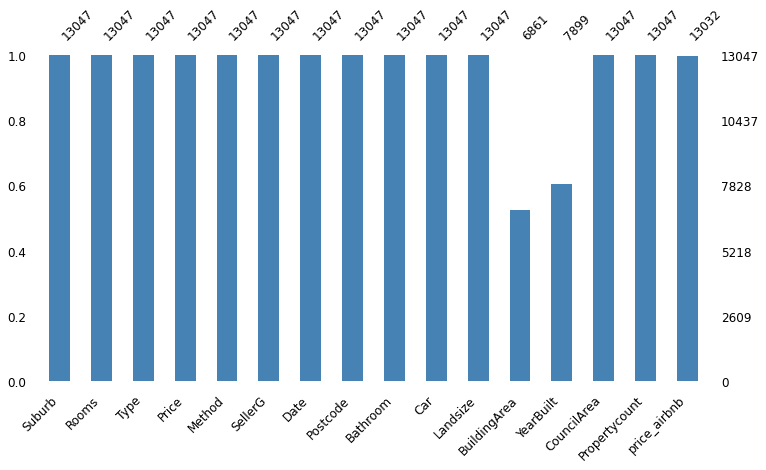

In [ ]:
msno.bar(merged_df,figsize=(12, 6), fontsize=12, color='steelblue')

De esta manera, resta imputar valores a las columnas numéricas "BuildingArea", "YearBuilt" y "price_airbnb". Las dos primeras nomrbadas se imputarán en la Parte 2 del Entregable, como y ase mencionó. La variable "price_airbnb" se imputa a continuación, ya que en el merge de ambos dataframes la cantidad de Postcodes del primero era mayor al del proveniente de la database de AriBnB. Como se observa en el gráfico anterior, resta imputar 20 valores para la columna "price_airbnb". Esto se hará en base a la mediana de la columna "Price"

In [ ]:
merged_df["price_airbnb"] =merged_df["price_airbnb"].fillna(merged_df.groupby('Postcode')['Price'].transform('median'))
merged_df.describe()

,Rooms,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_airbnb
count,13047.000000,1.304700e+04,13047.000000,13047.000000,13047.000000,13047.000000,6861.000000,7899.000000,13047.000000,13047.000000
mean,2.949337,1.075169e+06,3104.591784,1.530697,1.604277,417.074117,140.064333,1964.511584,7445.872001,736.281637
std,0.943259,6.265884e+05,89.485543,0.667312,0.924478,291.982819,70.964599,36.083138,4382.421537,18348.051373
min,1.000000,8.500000e+04,3000.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,389.000000,40.000000
25%,2.000000,6.500000e+05,3044.000000,1.000000,1.000000,171.000000,94.000000,1940.000000,4380.000000,94.205128
50%,3.000000,9.060000e+05,3084.000000,1.000000,2.000000,418.000000,126.000000,1970.000000,6543.000000,114.142857
75%,4.000000,1.330000e+06,3147.000000,2.000000,2.000000,641.000000,172.000000,1998.000000,10331.000000,147.729515
max,8.000000,9.000000e+06,3977.000000,5.000000,6.000000,1489.000000,495.000000,2017.000000,21650.000000,817000.000000


Se chequea gráficamente que no queden valores por imputar:

<AxesSubplot:>

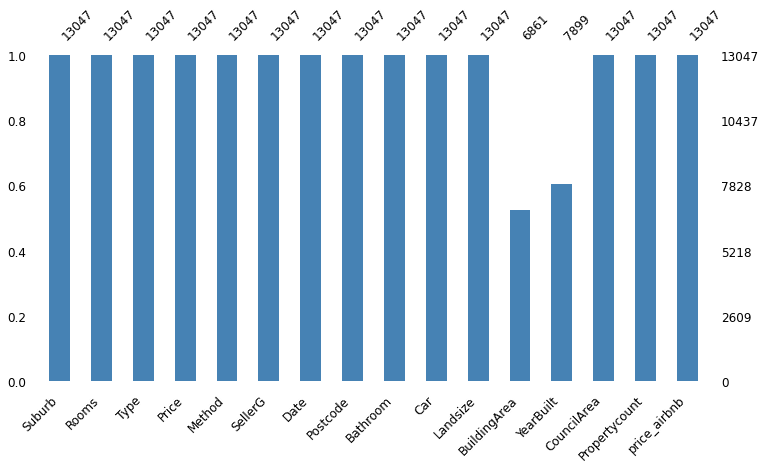

In [ ]:
msno.bar(merged_df,figsize=(12, 6), fontsize=12, color='steelblue')

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
melbourn_housing = merged_df.copy()

In [ ]:
melbourn_housing.to_csv('melbourn_housing.csv', index=False) 
